In [1]:
# Import necessary libraries
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Define function to load images and labels
def load_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if img_path.endswith(".jpg") or img_path.endswith(".png"):  # assuming images are in jpg or png format
            img = cv2.imread(img_path)
            img = cv2.resize(img, (100, 100))  # resize images for consistency
            images.append(img)
            labels.append(label)
    return images, labels

In [3]:
# Load infected images
infected_folder = '/content/drive/MyDrive/PROJECT/PIT'
infected_images, infected_labels = load_images(infected_folder, 1)

# Load healthy images
healthy_folder = '/content/drive/MyDrive/PROJECT/PHT'
healthy_images, healthy_labels = load_images(healthy_folder, 0)

In [4]:
# Concatenate infected and healthy images
X = np.concatenate((infected_images, healthy_images), axis=0)
y = np.concatenate((infected_labels, healthy_labels))

In [5]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Flatten and reshape images for Random Forest
X_train_flat = np.array([image.flatten() for image in X_train])
X_test_flat = np.array([image.flatten() for image in X_test])


In [7]:
# Define Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_flat, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Predictions
y_pred = rf_classifier.predict(X_test_flat)

In [9]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9142857142857143
Precision: 0.8947368421052632
Recall: 0.9444444444444444
F1 Score: 0.918918918918919


In [10]:
# Display some sample predictions along with their corresponding images
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle('Sample Predictions', fontsize=16)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])
    ax.axis('off')
    ax.set_title(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

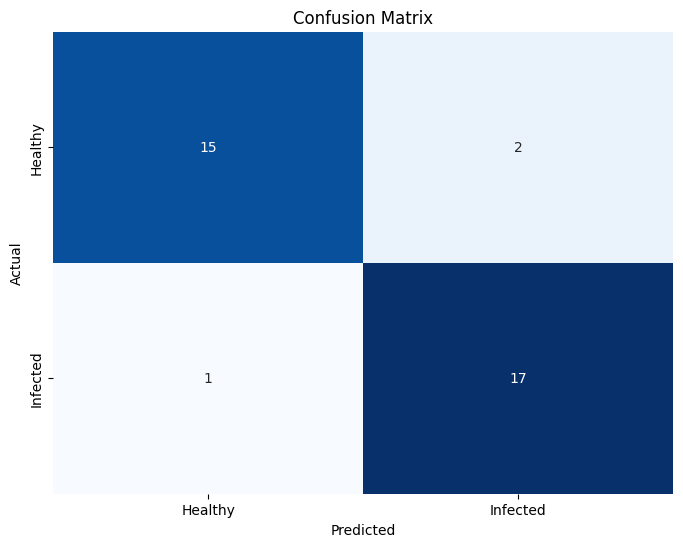

In [11]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Healthy', 'Infected'], yticklabels=['Healthy', 'Infected'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()